# Etown Women's Basketball Win Prediction

## Data loading

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
import os

player_data_list = []
team_data_list = []

directory = "./player_game_stats/"
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        player_data_list.append(df)
print(f"Loaded {len(player_data_list)} player data csv files.")

directory = "./team_game_stats/"
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        team_data_list.append(df)
print(f"Loaded {len(team_data_list)} team data csv files.")


Loaded 651 player data csv files.
Loaded 651 team data csv files.


In [274]:
player_stats = pd.concat(player_data_list, axis=0)
team_stats = pd.concat(team_data_list, axis=0)

In [275]:
display(player_stats.shape)
display(player_stats.head())
display(player_stats.info())
display(player_stats.describe())
display(player_stats.isnull().sum())

(14864, 17)

,##,Player,GS,MIN,FG,3PT,FT,ORB-DRB,REB,PF,A,TO,BLK,STL,PTS,Team,game_id
0,12,"Boggs,Gabby",*,40,8-14,0-0,7-9,5-10,15,2,4,3,4,1,23,Albright College,Albright College_Moravian University_11-9-2022
1,24,"Rauf,Amina",*,36,3-12,0-3,5-8,1-3,4,2,1,1,0,0,11,Albright College,Albright College_Moravian University_11-9-2022
2,22,"Edmond,Orianna",*,24,3-6,0-0,5-6,4-2,6,2,0,3,0,1,11,Albright College,Albright College_Moravian University_11-9-2022
3,1,"Dover,Mackenzie",*,36,2-11,1-4,2-2,3-5,8,2,5,5,0,0,7,Albright College,Albright College_Moravian University_11-9-2022
4,3,"Williamson,Lindsey",*,25,1-8,1-2,0-0,1-1,2,0,2,1,0,0,3,Albright College,Albright College_Moravian University_11-9-2022


<class 'pandas.core.frame.DataFrame'>
Index: 14864 entries, 0 to 21
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ##       14864 non-null  object
 1   Player   14864 non-null  object
 2   GS       6510 non-null   object
 3   MIN      14864 non-null  object
 4   FG       14864 non-null  object
 5   3PT      14864 non-null  object
 6   FT       14864 non-null  object
 7   ORB-DRB  14864 non-null  object
 8   REB      14864 non-null  int64 
 9   PF       14864 non-null  int64 
 10  A        14864 non-null  int64 
 11  TO       14864 non-null  int64 
 12  BLK      14864 non-null  int64 
 13  STL      14864 non-null  int64 
 14  PTS      14864 non-null  int64 
 15  Team     14864 non-null  object
 16  game_id  14864 non-null  object
dtypes: int64(7), object(10)
memory usage: 2.0+ MB


None

,REB,PF,A,TO,BLK,STL,PTS
count,14864.000000,14864.000000,14864.000000,14864.000000,14864.000000,14864.000000,14864.000000
mean,3.169537,1.439316,1.137043,1.512244,0.296757,0.803821,5.472215
std,3.059380,1.342840,1.480635,1.663993,0.690377,1.142005,5.822861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000
75%,5.000000,2.000000,2.000000,2.000000,0.000000,1.000000,8.000000
max,23.000000,6.000000,15.000000,21.000000,10.000000,10.000000,43.000000


##            0
Player        0
GS         8354
MIN           0
FG            0
3PT           0
FT            0
ORB-DRB       0
REB           0
PF            0
A             0
TO            0
BLK           0
STL           0
PTS           0
Team          0
game_id       0
dtype: int64

In [276]:
display(team_stats.shape)
display(team_stats.head())
display(team_stats.info())
display(team_stats.describe())
display(team_stats.isnull().sum())

(1302, 20)

,game_id,Team,Home/Away,Date,Attendance,Site,Referees,MIN,FG,3PT,FT,ORB-DRB,REB,PF,A,TO,BLK,STL,PTS,Notes
0,Albright College_Moravian University_11-9-2022,Albright College,home,11-9-2022,317.0,Johnston Hall,"Sharvez Brown, Bobby Hoppe, Stacey Smalls",200,20-59,2-11,22-31,21-30,51,12,12,17,5,3,64,NaN
1,Albright College_Moravian University_11-9-2022,Moravian University,away,11-9-2022,317.0,Johnston Hall,"Sharvez Brown, Bobby Hoppe, Stacey Smalls",200,29-70,4-9,4-8,13-23,36,24,17,11,7,6,66,NaN
0,Albright_Goucher_11-11-2023,Albright,home,11-11-2023,158.0,"Decker Sports & Recreation Center, Towson, MD","Samantha Jackson, Amanda Censullo-Mioni, Ronal...",200,33-83,6-18,13-21,29-31,60,15,20,21,2,13,85,NaN
1,Albright_Goucher_11-11-2023,Goucher,away,11-11-2023,158.0,"Decker Sports & Recreation Center, Towson, MD","Samantha Jackson, Amanda Censullo-Mioni, Ronal...",200,18-53,7-20,6-14,7-28,35,22,8,32,1,9,49,NaN
0,Albright_Moravian_11-15-2024,Albright,home,11-15-2024,135.0,"Johnston Hall, Bethlehem, PA","Brian Callahan, Morgan Faust, Barry Vaughn",200,26-56,4-9,11-17,13-26,39,16,11,20,6,6,67,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   game_id     1302 non-null   object 
 1   Team        1302 non-null   object 
 2   Home/Away   1302 non-null   object 
 3   Date        1302 non-null   object 
 4   Attendance  1220 non-null   float64
 5   Site        1302 non-null   object 
 6   Referees    742 non-null    object 
 7   MIN         1302 non-null   int64  
 8   FG          1302 non-null   object 
 9   3PT         1302 non-null   object 
 10  FT          1302 non-null   object 
 11  ORB-DRB     1302 non-null   object 
 12  REB         1302 non-null   int64  
 13  PF          1302 non-null   int64  
 14  A           1302 non-null   int64  
 15  TO          1302 non-null   int64  
 16  BLK         1302 non-null   int64  
 17  STL         1302 non-null   int64  
 18  PTS         1302 non-null   int64  
 19  Notes       172 non-null    object 

None

,Attendance,MIN,REB,PF,A,TO,BLK,STL,PTS
count,1220.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000
mean,207.214754,200.917051,40.507680,16.43318,12.980799,17.788018,3.387865,9.176651,62.47235
std,152.577413,5.776855,8.988738,4.79284,5.400951,6.565784,2.346458,4.790890,15.97660
min,7.000000,150.000000,15.000000,5.00000,1.000000,4.000000,0.000000,0.000000,14.00000
25%,112.000000,200.000000,35.000000,13.00000,9.000000,13.000000,2.000000,6.000000,52.00000
50%,168.500000,200.000000,40.000000,16.00000,12.000000,17.000000,3.000000,8.000000,62.00000
75%,244.000000,200.000000,46.000000,20.00000,16.000000,21.000000,5.000000,11.000000,73.00000
max,1345.000000,250.000000,79.000000,36.00000,34.000000,59.000000,12.000000,42.000000,135.00000


game_id          0
Team             0
Home/Away        0
Date             0
Attendance      82
Site             0
Referees       560
MIN              0
FG               0
3PT              0
FT               0
ORB-DRB          0
REB              0
PF               0
A                0
TO               0
BLK              0
STL              0
PTS              0
Notes         1130
dtype: int64

## Data Cleaning

In [277]:
player_stats.drop(columns=['GS'], inplace=True)
team_stats.drop(columns=['Attendance','Referees','Notes'], inplace=True) # Null columns


In [278]:
display(player_stats.isnull().sum())
display(team_stats.isnull().sum())

##         0
Player     0
MIN        0
FG         0
3PT        0
FT         0
ORB-DRB    0
REB        0
PF         0
A          0
TO         0
BLK        0
STL        0
PTS        0
Team       0
game_id    0
dtype: int64

game_id      0
Team         0
Home/Away    0
Date         0
Site         0
MIN          0
FG           0
3PT          0
FT           0
ORB-DRB      0
REB          0
PF           0
A            0
TO           0
BLK          0
STL          0
PTS          0
dtype: int64

### Extract data from String columns

In [304]:
team_stats['FG%'] = team_stats['FG'].apply(lambda x: int(x.split('-')[0]) / int(x.split('-')[1]) if int(x.split('-')[1])!=0 else 0)
team_stats['3PT%'] = team_stats['3PT'].apply(lambda x: int(x.split('-')[0]) / int(x.split('-')[1]) if int(x.split('-')[1])!=0 else 0)
team_stats['FT%'] = team_stats['FT'].apply(lambda x: int(x.split('-')[0]) / int(x.split('-')[1]) if int(x.split('-')[1])!=0 else 0)
team_stats['ORB'] = team_stats['ORB-DRB'].apply(lambda x: int(x.split('-')[0]))
team_stats['DRB'] = team_stats['ORB-DRB'].apply(lambda x: int(x.split('-')[1]))

team_stats.drop(columns=['FG', '3PT', 'FT', 'ORB-DRB'], inplace=True)

In [305]:
player_stats['FG%'] = player_stats['FG'].apply(lambda x: int(x.split('-')[0]) / int(x.split('-')[1]) if int(x.split('-')[1])!=0 else 0)
player_stats['3PT%'] = player_stats['3PT'].apply(lambda x: int(x.split('-')[0]) / int(x.split('-')[1]) if int(x.split('-')[1])!=0 else 0)
player_stats['FT%'] = player_stats['FT'].apply(lambda x: int(x.split('-')[0]) / int(x.split('-')[1]) if int(x.split('-')[1])!=0 else 0)
player_stats['ORB'] = player_stats['ORB-DRB'].apply(lambda x: int(x.split('-')[0]))
player_stats['DRB'] = player_stats['ORB-DRB'].apply(lambda x: int(x.split('-')[1]))

player_stats.drop(columns=['FG', '3PT', 'FT', 'ORB-DRB'], inplace=True)

### Create wins column with team match data

In [307]:
maxes = team_stats.reset_index().groupby(by='game_id')['PTS'].idxmax() # get indexes of winning matchups

l = np.arange(team_stats.shape[0])
wins_mask = [val in maxes.values for val in l] # create boolean list of whether the game is a winner
team_stats['is_win'] = wins_mask

team_stats.head()

,game_id,Team,Home/Away,Date,Site,MIN,REB,PF,A,TO,BLK,STL,PTS,FG%,3PT%,FT%,ORB,DRB,is_win
0,Albright College_Moravian University_11-9-2022,Albright College,home,11-9-2022,Johnston Hall,200,51,12,12,17,5,3,64,0.338983,0.181818,0.709677,21,30,False
1,Albright College_Moravian University_11-9-2022,Moravian University,away,11-9-2022,Johnston Hall,200,36,24,17,11,7,6,66,0.414286,0.444444,0.500000,13,23,True
0,Albright_Goucher_11-11-2023,Albright,home,11-11-2023,"Decker Sports & Recreation Center, Towson, MD",200,60,15,20,21,2,13,85,0.397590,0.333333,0.619048,29,31,True
1,Albright_Goucher_11-11-2023,Goucher,away,11-11-2023,"Decker Sports & Recreation Center, Towson, MD",200,35,22,8,32,1,9,49,0.339623,0.350000,0.428571,7,28,False
0,Albright_Moravian_11-15-2024,Albright,home,11-15-2024,"Johnston Hall, Bethlehem, PA",200,39,16,11,20,6,6,67,0.464286,0.444444,0.647059,13,26,True


In [308]:
player_stats['is_win'] = player_stats.apply(lambda series: bool(team_stats[(team_stats['game_id']==series.loc['game_id'])&(team_stats['Team']==series.loc['Team'])]['is_win'].iloc[0]), axis=1)

In [309]:
player_stats.head(10)

,##,Player,MIN,REB,PF,A,TO,BLK,STL,PTS,Team,game_id,FG%,3PT%,FT%,ORB,DRB,is_win
0,12,"Boggs,Gabby",40,15,2,4,3,4,1,23,Albright College,Albright College_Moravian University_11-9-2022,0.571429,0.00,0.777778,5,10,False
1,24,"Rauf,Amina",36,4,2,1,1,0,0,11,Albright College,Albright College_Moravian University_11-9-2022,0.250000,0.00,0.625000,1,3,False
2,22,"Edmond,Orianna",24,6,2,0,3,0,1,11,Albright College,Albright College_Moravian University_11-9-2022,0.500000,0.00,0.833333,4,2,False
3,1,"Dover,Mackenzie",36,8,2,5,5,0,0,7,Albright College,Albright College_Moravian University_11-9-2022,0.181818,0.25,1.000000,3,5,False
4,3,"Williamson,Lindsey",25,2,0,2,1,0,0,3,Albright College,Albright College_Moravian University_11-9-2022,0.125000,0.50,0.000000,1,1,False
5,5,"Jones,Amy",10,1,1,0,0,0,0,5,Albright College,Albright College_Moravian University_11-9-2022,0.500000,0.00,0.500000,1,0,False
6,23,"Zakovitch,Julia",16,4,3,0,0,1,1,3,Albright College,Albright College_Moravian University_11-9-2022,0.500000,0.00,0.500000,1,3,False
7,13,"Apistar,Crisanta",11,2,0,0,1,0,0,1,Albright College,Albright College_Moravian University_11-9-2022,0.000000,0.00,0.500000,2,0,False
8,33,"Pool,Lauren",2,0,0,0,1,0,0,0,Albright College,Albright College_Moravian University_11-9-2022,0.000000,0.00,0.000000,0,0,False
9,20,Tessa Zamolyi,22,10,4,3,0,0,0,19,Moravian University,Albright College_Moravian University_11-9-2022,0.562500,0.50,0.000000,5,5,True


## EDA

In [284]:
conference_teams = ['Goucher',
'Scranton',
'Elizabethtown',
'Catholic',
'Susquehanna',
'Juniata',
'Drew',
'Moravian',
'Lycoming',
'Wilkes']

<Axes: xlabel='is_win', ylabel='count'>

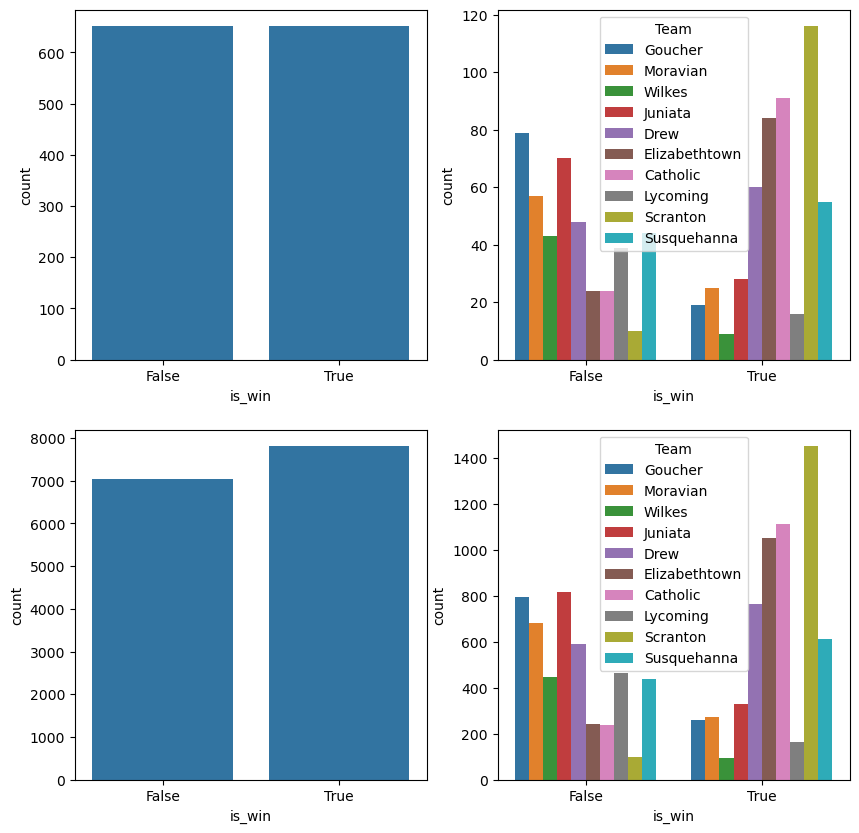

In [285]:
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize = (10,10))

sns.countplot(data=team_stats, x='is_win', ax=axes[0][0])
sns.countplot(data=team_stats[team_stats['Team'].apply(lambda team: team in conference_teams)], x='is_win', hue='Team', ax=axes[0][1])
sns.countplot(data=player_stats, x='is_win', ax=axes[1][0])
sns.countplot(data=player_stats[player_stats['Team'].apply(lambda team: team in conference_teams)], x='is_win', hue='Team', ax=axes[1][1])

##### There is clearly more games recorded with teams that are within conference vs out of conference.

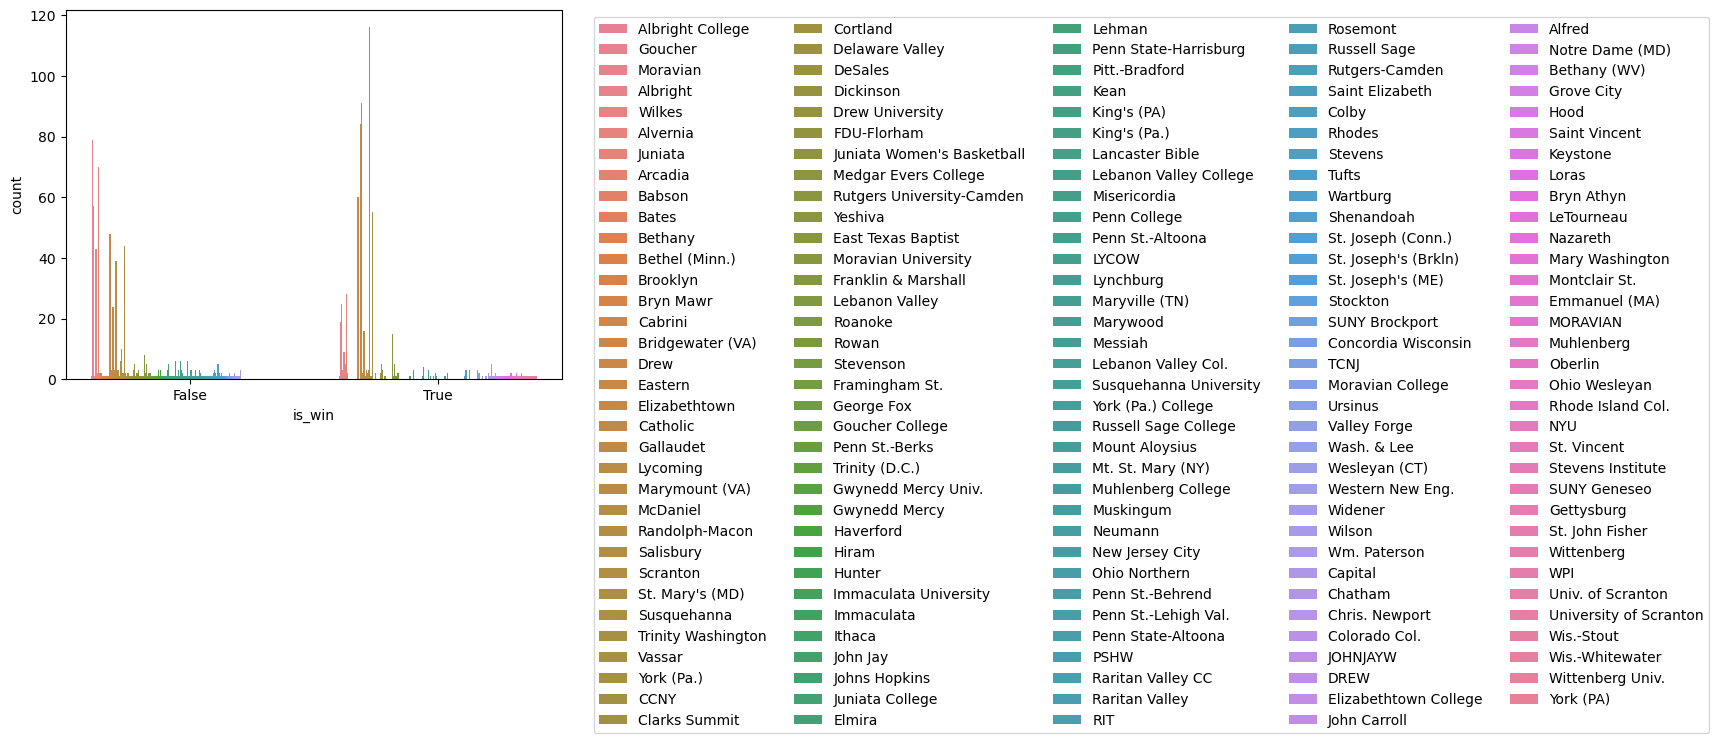

In [286]:
sns.countplot(data=team_stats, x='is_win', hue='Team')

plt.legend(bbox_to_anchor=(1.05, 1), ncol=5)

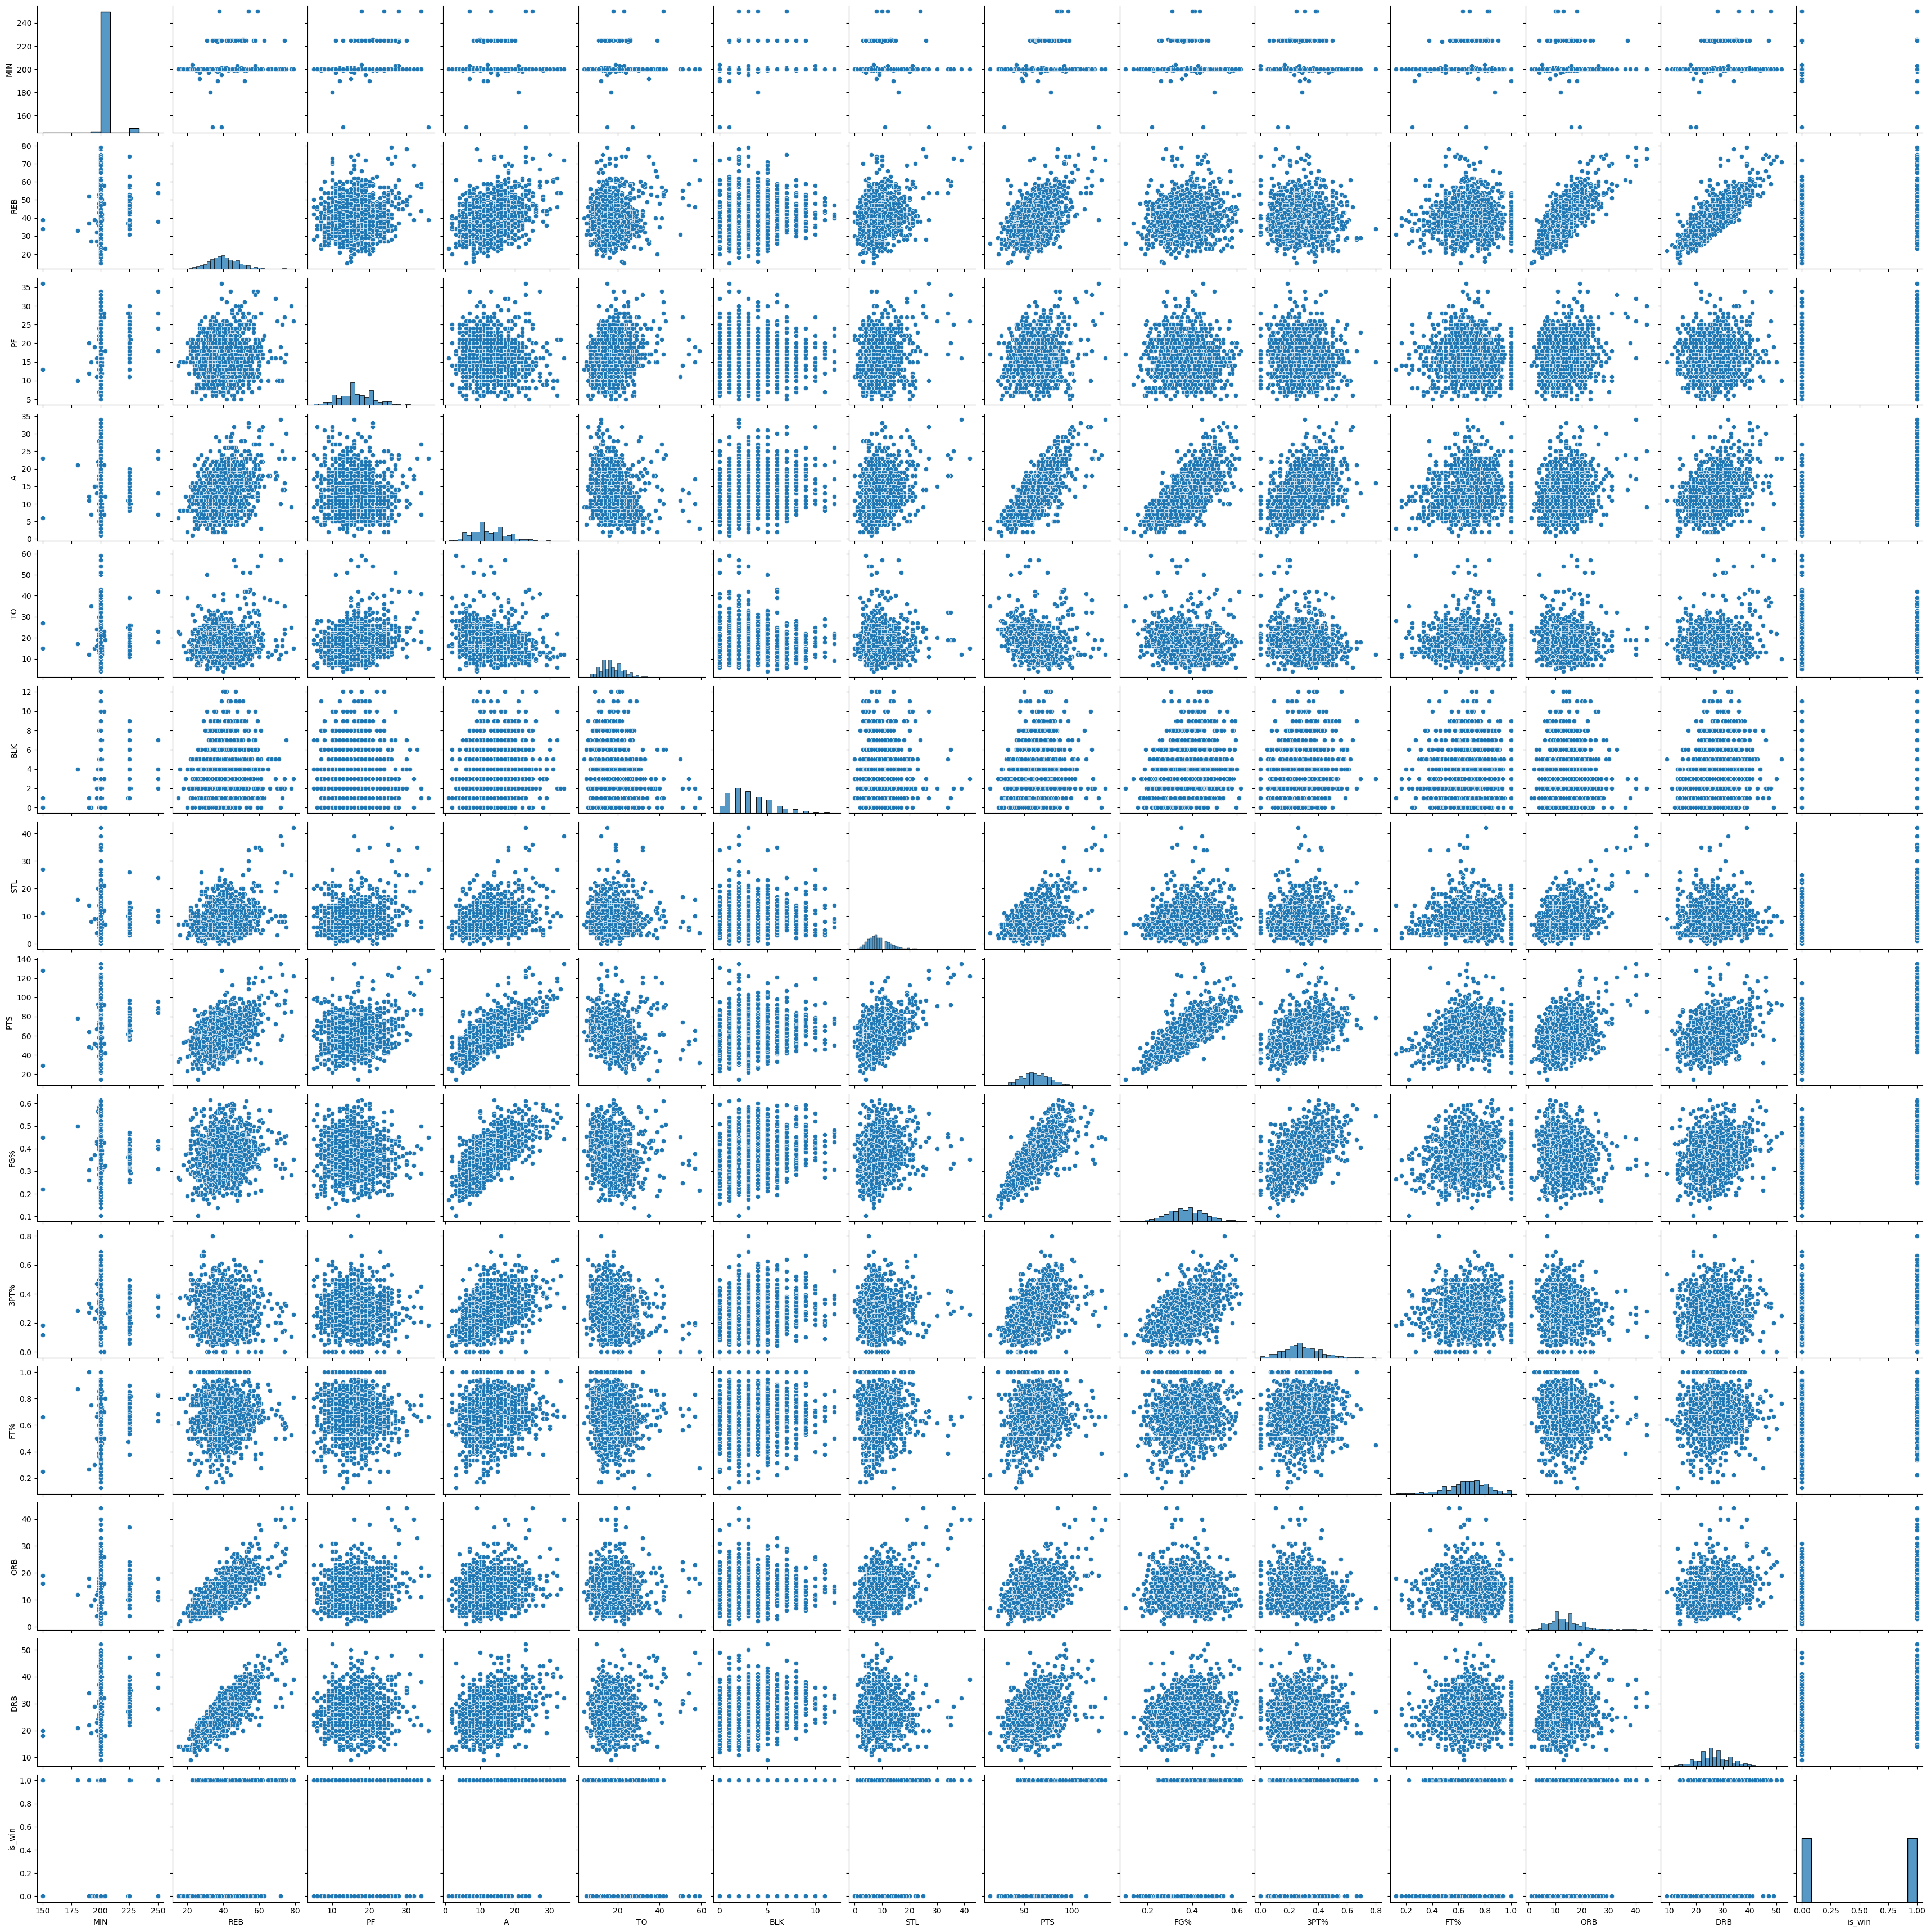

In [310]:
sns.pairplot(data=team_stats)

##### Points, Steals, Attempts, and Rebounds are more than neglibably positively correlated with winning, whereas Turnovers are noticably negatively correlated.

In [ ]:
sns.pairplot(data=player_stats)

##### Not too many individual correlations; same correlations though on a smaller degree. Points and steals do not seem to be as impactful. 

Text(0.5, 1.0, 'Distribution of Conference Team game points')

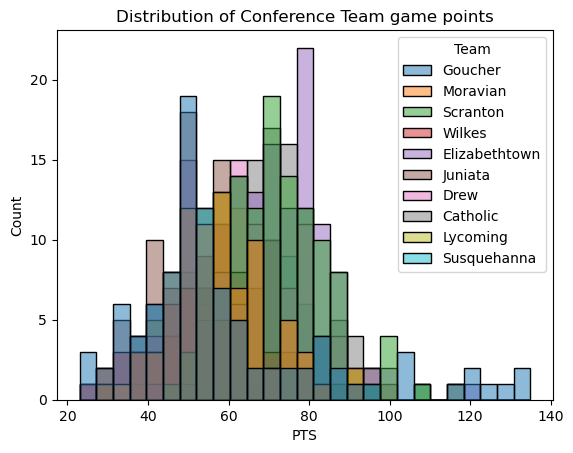

In [291]:
sns.histplot(data=team_stats[team_stats['Team'].apply(lambda team: team in conference_teams)], x='PTS', hue='Team')
plt.title('Distribution of Conference Team game points')

C:\Users\ajfri\AppData\Local\Temp\ipykernel_4988\2332230497.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.01, 1), ncol=5)


Text(0.5, 1.0, 'Distribution of All Teams game points')

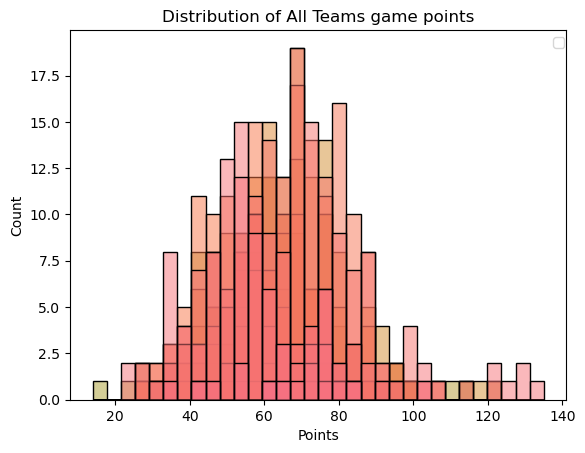

In [303]:
ax = sns.histplot(data=team_stats, x='PTS', hue='Team')
plt.legend(bbox_to_anchor=(1.05, 1), ncol=5)
plt.xlabel('Points')
plt.title('Distribution of All Teams game points')